In [40]:
import glob
import os
import email
from email.parser import Parser
import csv
import datetime
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [31]:
file_list = glob.glob('midterm\data\enron\\*')
#print(file_list)
sent_item_details={}                   #dictionary to store all sent items and its date
date_list =[]                          #List to store all email dates

In [32]:
def sentFunction(filename):
    #print('sent func called')
    headers = Parser().parse(open(filename, 'r'))
    msgID = headers['Message-ID']
    date1 = parse(headers['Date'])
    myDate =(date1.strftime('%m/%Y'))
    date_list.append(myDate)
    sent_item_details.update({msgID: myDate})
    #return msgID,d1
    

In [33]:
for filename in file_list:
    #print('Processing user:'+filename)
    try:
        file = filename+'\sent'
        if os.path.exists(file):
            templist = glob.glob(file+'\*')
            for f1 in templist:
                sentFunction(f1)
        file = filename+'\\_sent_mail'
        if os.path.exists(file):
            templist = glob.glob(file+'\*')
            for f1 in templist:
                sentFunction(f1)
        file = filename+'\\sent_items'
        if os.path.exists(file):
            templist = glob.glob(file+'\*')
            for f1 in templist:
                sentFunction(f1)
    except Exception:
        print("sent folder is not present for: "+file) 
print('All users processed moving to sent date count')

Processing user:midterm\data\enron\allen-p
Processing user:midterm\data\enron\arnold-j
Processing user:midterm\data\enron\arora-h
Processing user:midterm\data\enron\badeer-r
Processing user:midterm\data\enron\bailey-s
Processing user:midterm\data\enron\bass-e
Processing user:midterm\data\enron\baughman-d
Processing user:midterm\data\enron\beck-s
Processing user:midterm\data\enron\benson-r
Processing user:midterm\data\enron\blair-l
Processing user:midterm\data\enron\brawner-s
Processing user:midterm\data\enron\buy-r
Processing user:midterm\data\enron\campbell-l
Processing user:midterm\data\enron\carson-m
Processing user:midterm\data\enron\cash-m
Processing user:midterm\data\enron\causholli-m
Processing user:midterm\data\enron\corman-s
Processing user:midterm\data\enron\crandell-s
Processing user:midterm\data\enron\cuilla-m
Processing user:midterm\data\enron\dasovich-j
Processing user:midterm\data\enron\davis-d
Processing user:midterm\data\enron\dean-c
Processing user:midterm\data\enron\

NameError: name 'Print' is not defined

In [34]:
sent_year_count ={}
# for x,y in sent_item_details.items():
#     sent_count =0
#     if y not in sent_year_count.items():
#         sent_year_count[y]=1
#     else:
#         sent_year_count[y]=sent_year_count[y]+1
#     sent_year_count.update({myYear:sent_count})
# print(sent_year_count)

for d in date_list:    #for loop to get count for each word
    if d not in sent_year_count:
        sent_year_count[d]=1
    else:
        sent_year_count[d]=sent_year_count[d]+1
#print(sent_year_count)

{'03/2001': 7013, '01/2002': 3249, '02/2001': 6871, '06/1999': 250, '08/2000': 5248, '06/2001': 2973, '07/2002': 42, '03/1999': 40, '11/1998': 23, '06/2000': 3862, '10/2000': 6780, '02/2000': 1924, '09/2000': 5549, '03/2002': 908, '01/2000': 2047, '05/2001': 6839, '04/2001': 8263, '12/1998': 49, '11/2001': 6410, '07/2001': 2465, '01/1999': 58, '05/1999': 266, '11/1999': 343, '12/2001': 2598, '09/2001': 3361, '07/2000': 4057, '02/2002': 1467, '10/2001': 7893, '01/2001': 6957, '03/2000': 2513, '08/1999': 373, '02/1999': 34, '06/2002': 189, '04/2002': 313, '04/2000': 2566, '09/1999': 442, '10/1998': 4, '10/1999': 411, '07/1999': 304, '12/1999': 1092, '04/1999': 20, '11/2000': 6922, '05/2002': 157, '08/2001': 3034, '05/2000': 3008, '12/2000': 6495}


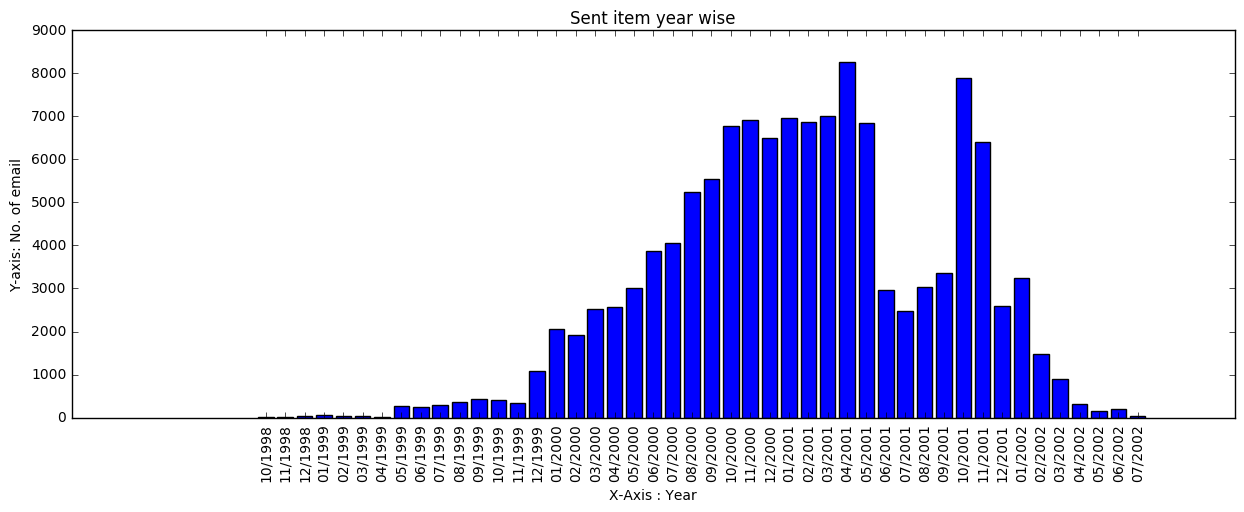

In [84]:
# ordered_data = sorted(sent_year_count.items(), key = lambda x:datetime.datetime.strptime(x[0],'%m/%Y'))
# temp_dic ={}
# #print(ordered_data)
# tempX =[x[0] for x in ordered_data]
# #print(tempX)
# tempY = [x[1] for x in ordered_data]
# for x in tempX:
#     for y in tempY:
#         temp_dic.update({x:y})
# print(temp_dic)
         

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
plt.xlabel("X-Axis : Year")
plt.ylabel("Y-axis: No. of email")
plt.title('Sent item year wise')
plt.bar(range(len(sent_year_count)), [x[1] for x in sorted(sent_year_count.items(), key = lambda x:datetime.datetime.strptime(x[0],'%m/%Y'))], align='center')
plt.xticks(range(len(sent_year_count)), [x[0] for x in sorted(sent_year_count.items(), key = lambda x:datetime.datetime.strptime(x[0],'%m/%Y'))],rotation='vertical')

plt.show()

In [38]:
file = open('sentItem.csv','w',newline='')   # code to write list into CSV
writer =csv.writer(file)
writer.writerow([ "Year","Count"])
for x,y in sent_year_count.items(): 
    writer.writerow([x,y])

